In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
words = open('names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
#Block Size

block_size = 3 #context Length : How many charecters we want
X,Y = [],[]
for w in words:
  # print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    # print(ch)
    X.append(context)
    Y.append(ix)
    # print(''.join(itos[i] for i in context), '---->' , itos[ix] )
    context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape,X.dtype,Y.shape,Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [ ]:
a

In [ ]:
C

tensor([[-0.4698,  0.3402],
        [ 1.3539, -0.9404],
        [-1.8607,  0.3464],
        [-0.2599, -0.4792],
        [ 0.1969,  2.2233],
        [ 1.0766, -0.2649],
        [ 0.0231, -0.2733],
        [-1.9195, -0.7237],
        [ 0.7570,  0.6671],
        [-0.2142,  0.2811],
        [ 0.4474, -1.0703],
        [ 1.2450,  1.0373],
        [ 0.0223,  0.3056],
        [ 0.4097, -0.1111],
        [-1.4279, -0.3856],
        [ 1.2065, -0.2816],
        [ 0.4968,  3.5796],
        [-0.1058, -0.2520],
        [ 0.6604,  0.3283],
        [ 0.3332,  1.2218],
        [-1.3863, -0.5344],
        [ 0.3099, -0.3249],
        [-0.5585,  0.7807],
        [ 0.8610,  0.1482],
        [-1.8243, -0.2240],
        [ 0.2504,  0.6549],
        [-1.7327,  0.3330]])

In [ ]:
C[5]

tensor([ 1.0766, -0.2649])

In [ ]:
F.one_hot(torch.tensor(5),num_classes=27).float() @ C

tensor([ 1.0766, -0.2649])

In [ ]:
C[torch.tensor([2,3,4])]

tensor([[-1.8607,  0.3464],
        [-0.2599, -0.4792],
        [ 0.1969,  2.2233]])

In [ ]:
C[X].shape

torch.Size([228146, 3, 2])

In [ ]:
C[X][13,2]

tensor([ 1.3539, -0.9404])

In [ ]:
X[13,2]

tensor(1)

In [ ]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [ ]:
W1 = torch.randn([6,100])
b1 = torch.randn([100])

In [ ]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [ ]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],1).shape

torch.Size([32, 6])

In [ ]:
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([32, 6])

In [ ]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
h.shape

torch.Size([32, 100])

In [ ]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2


In [ ]:
logits.shape

torch.Size([32, 27])

In [ ]:
counts = logits.exp()
probs = counts / counts.sum(1,keepdims=True)
probs.shape

torch.Size([32, 27])

In [ ]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
probs[torch.arange(32),Y]

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [ ]:
loss = -probs[torch.arange(32),Y].log().mean()
loss

tensor(15.4700)

In [ ]:
loss = F.cross_entropy(logits,Y)
loss

tensor(15.4700)

In [ ]:
parameters = [C,W1,b1,W2,b2]
for p in parameters:
  p.requires_grad = True

In [ ]:
sum(p.nelement() for p in parameters)

3481

In [ ]:
C  = torch.randn([27,10])
W1 = torch.randn([30,200])
b1 = torch.randn([200])
W2 = torch.randn((200,27))
b2 = torch.randn(27)
parameters = [C,W1,b1,W2,b2]
for p in parameters:
  p.requires_grad = True

In [ ]:
# lri = []
lossi = []
stepi = []

In [ ]:
for i in range(50000):
  #minibatch construct
  ix = torch.randint(0,Xtr.shape[0],(32,))
  emb = C[Xtr[ix]]
  h = torch.tanh(emb.view(-1,30) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits,Ytr[ix])
  #Backward Pass
  # print(loss.item())
  # parameters = [C,W1,b1,W2,b2]
  for p in parameters:
    p.grad = None
  loss.backward()
  #update
  lr = 0.01
  for p in parameters:
    p.data += -lr*p.grad

  # lri.append(lr)
  # lossi.append(loss.item())
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

2.4159903526306152


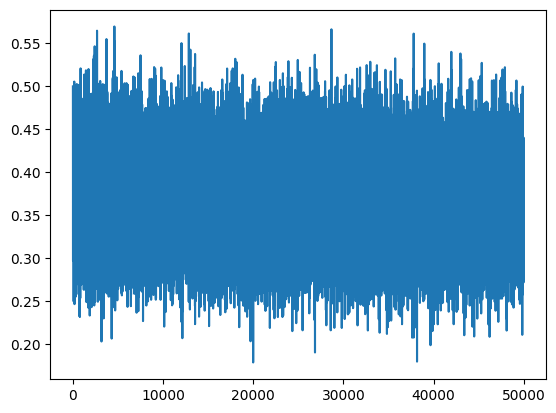

In [ ]:
plt.plot(stepi,lossi)

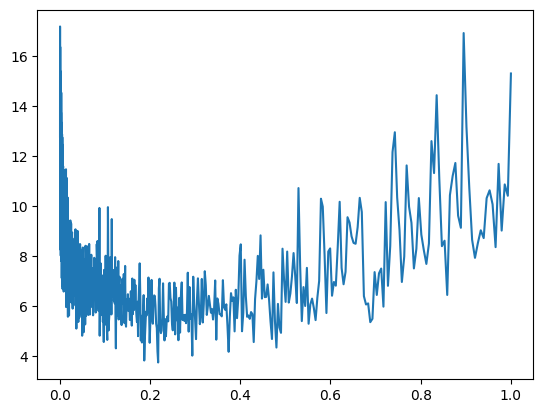

In [ ]:
plt.plot(lri,lossi)

In [ ]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ytr)
print(loss)

tensor(2.3285, grad_fn=<NllLossBackward0>)


In [ ]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev)
print(loss)

tensor(2.3529, grad_fn=<NllLossBackward0>)


In [ ]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [ ]:
#train split, test split, dev split
# 80 , 10 , 10

In [ ]:
#Build the dataset

def build_dataset(words):
  block_size = 3
  X,Y = [],[]

  for w in words:
    context = [0]*block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  return X,Y


import random
random.seed(42)
random.shuffle(words)

n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr,Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xte,Yte = build_dataset(words[n2:])

In [ ]:
Xtr.shape,Ytr.shape

(torch.Size([182437, 3]), torch.Size([182437]))

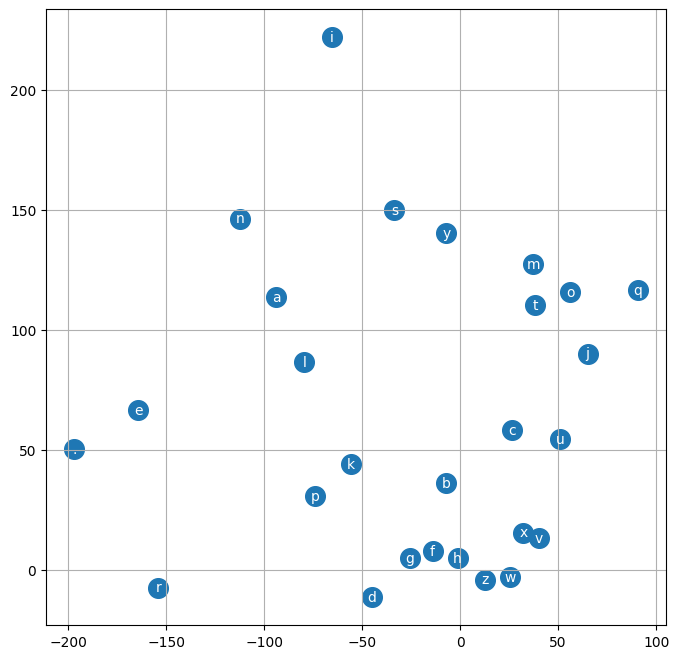

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data,C[:,1].data,s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(),C[i,1].item(),itos[i],ha="center",va="center",color="white")
plt.grid('minor')